In [1]:
import pandas as pd

#### Import des données

In [2]:
data = pd.read_csv(r'/home/utilisateur/Téléchargements/EDA(2).csv')
pd.set_option('display.max_columns', None)
data.sample(1)

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,budget,nationality,directors,all_director_oscars,all_actor_oscars,actor_celebs,actor_celebs_by_year,vacances_automne,vacances_noel,vacances_hiver,vacances_printemps,vacances_ete,nb_zone_en_vacances,entries_mean_actor,entries_sum_actor,entries_mean_director,entries_sum_director,jpbox_copies,imdb_entries,imdb_us_entries,imdb_id,cumulative_entries,distributors,entries
12661,408893,Frankie,2019,0,NaN,100,Trois générations doivent faire face à une exp...,NaN,NaN,SBS Productions|O Som e a Fúria|Beluga Tree,0,France|Portugal,Ira Sachs,NaN,NaN,NaN,NaN,0,0,0,0,0,0,630686.0,110854898.0,NaN,0.0,NaN,725642.0,171781.0,tt8019694,NaN,NaN,NaN


#### Suppression des features inutiles

In [3]:
# data = data.drop(columns=['budget', 'entries_sum_composer', 'entries_mean_composer', 'original_title', 'poster_link', 'all_director_oscars', 'all_actor_oscars', 'actor_celebs', 'actor_celebs_by_year'])
data = data.drop(columns=['vacances_ete', 'societies', 'nb_zone_en_vacances', 'vacances_noel', 'imdb_entries', 'imdb_us_entries', 'imdb_id', 'budget', 'original_title', 'poster_link', 'all_director_oscars', 'all_actor_oscars', 'actor_celebs', 'actor_celebs_by_year'])
data.dtypes 

id_allocine                int64
title                     object
release_year               int64
genres                    object
duration_m                 int64
synopsis                  object
release_date              object
nationality               object
directors                 object
vacances_automne           int64
vacances_hiver             int64
vacances_printemps         int64
entries_mean_actor       float64
entries_sum_actor        float64
entries_mean_director    float64
entries_sum_director     float64
jpbox_copies             float64
cumulative_entries       float64
distributors              object
entries                  float64
dtype: object

Conversion de la release_date en trois nouvelles variables (year, month, day)

In [4]:
data['release_date'] = pd.to_datetime(data['release_date'])
# Création de nouvelles colonnes "year", "month" et "day" en extrayant l'année, le mois et le jour
data['year'] = data['release_date'].dt.year
data['month'] = data['release_date'].dt.month
data['day'] = data['release_date'].dt.day
data.dtypes

id_allocine                       int64
title                            object
release_year                      int64
genres                           object
duration_m                        int64
synopsis                         object
release_date             datetime64[ns]
nationality                      object
directors                        object
vacances_automne                  int64
vacances_hiver                    int64
vacances_printemps                int64
entries_mean_actor              float64
entries_sum_actor               float64
entries_mean_director           float64
entries_sum_director            float64
jpbox_copies                    float64
cumulative_entries              float64
distributors                     object
entries                         float64
year                            float64
month                           float64
day                             float64
dtype: object

In [5]:
data = data.drop(columns=["release_date"])
data.shape

(13499, 22)

#### Séparation des features catégorielles et quantitatives

In [6]:
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols 

Index(['title', 'genres', 'synopsis', 'nationality', 'directors',
       'distributors'],
      dtype='object')

### ML

Combien de valeurs NaN dans le dataframe?

In [7]:
nan_count_per_column =data.isna().sum(axis=0)
print(nan_count_per_column)

id_allocine                  0
title                        0
release_year                 0
genres                    9731
duration_m                   0
synopsis                     0
nationality                  0
directors                    0
vacances_automne             0
vacances_hiver               0
vacances_printemps           0
entries_mean_actor        8326
entries_sum_actor         8064
entries_mean_director    11175
entries_sum_director      8064
jpbox_copies             10323
cumulative_entries        9902
distributors              9731
entries                   9731
year                      9731
month                     9731
day                       9731
dtype: int64


In [8]:
data = data.dropna()
data.shape

(1260, 22)

#### Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=["entries"])
y=data["entries"]

In [10]:
y = y.dropna()
y.isna().sum()

0

#### Séparation & Imputation des features

In [11]:
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols = cat_cols.fillna('Missing')
cat_cols

Index(['title', 'genres', 'synopsis', 'nationality', 'directors',
       'distributors'],
      dtype='object')

In [12]:
num_cols = data.select_dtypes(exclude=['object']).columns
num_cols = num_cols[:-1]
num_cols 

Index(['id_allocine', 'release_year', 'duration_m', 'vacances_automne',
       'vacances_hiver', 'vacances_printemps', 'entries_mean_actor',
       'entries_sum_actor', 'entries_mean_director', 'entries_sum_director',
       'jpbox_copies', 'cumulative_entries', 'entries', 'year', 'month'],
      dtype='object')

In [13]:
X.isna().sum()

id_allocine              0
title                    0
release_year             0
genres                   0
duration_m               0
synopsis                 0
nationality              0
directors                0
vacances_automne         0
vacances_hiver           0
vacances_printemps       0
entries_mean_actor       0
entries_sum_actor        0
entries_mean_director    0
entries_sum_director     0
jpbox_copies             0
cumulative_entries       0
distributors             0
year                     0
month                    0
day                      0
dtype: int64

In [14]:
data = data.dropna()
data.isna().sum()

id_allocine              0
title                    0
release_year             0
genres                   0
duration_m               0
synopsis                 0
nationality              0
directors                0
vacances_automne         0
vacances_hiver           0
vacances_printemps       0
entries_mean_actor       0
entries_sum_actor        0
entries_mean_director    0
entries_sum_director     0
jpbox_copies             0
cumulative_entries       0
distributors             0
entries                  0
year                     0
month                    0
day                      0
dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from catboost import CatBoostRegressor
categ_cols = ['id_allocine', 'genres', 'nationality', 'directors', 'distributors', 'title', 'synopsis']
cat = CatBoostRegressor(cat_features=categ_cols)
cat.fit(X_train, y_train)

Learning rate set to 0.040995
0:	learn: 450637.9731053	total: 50.2ms	remaining: 50.1s
1:	learn: 441736.1061187	total: 53.5ms	remaining: 26.7s
2:	learn: 432295.1311864	total: 56.7ms	remaining: 18.8s
3:	learn: 423616.3504357	total: 59.5ms	remaining: 14.8s
4:	learn: 414705.1761460	total: 62.2ms	remaining: 12.4s
5:	learn: 406639.4336146	total: 64.7ms	remaining: 10.7s
6:	learn: 399025.7151007	total: 67.3ms	remaining: 9.55s
7:	learn: 391229.7063465	total: 70.1ms	remaining: 8.69s
8:	learn: 383985.4316789	total: 73.1ms	remaining: 8.05s
9:	learn: 377291.5403878	total: 75.7ms	remaining: 7.49s
10:	learn: 371369.7303154	total: 78.3ms	remaining: 7.04s
11:	learn: 365982.1797628	total: 80.7ms	remaining: 6.64s
12:	learn: 360281.0392029	total: 83.3ms	remaining: 6.33s
13:	learn: 354465.5598256	total: 85.9ms	remaining: 6.05s
14:	learn: 349392.4369983	total: 88.1ms	remaining: 5.78s
15:	learn: 343929.5003666	total: 90.7ms	remaining: 5.58s
16:	learn: 338880.0015063	total: 93.1ms	remaining: 5.38s
17:	learn: 

In [17]:
y_pred = cat.predict(X_test)
y_pred 

array([ 484123.63544337,  240865.01350444,  740459.15368976,
        131728.99197   ,  201834.76191214,  344273.39908421,
        211481.88659128,  137827.28153703,  369205.45416424,
        228233.71426063,  168801.84641214,  314337.18190844,
        531891.81875105,  771278.20589055,  125585.28196113,
        326424.03283015,  131844.69597083,  552366.26483823,
        769699.11157023,  278695.47319329,  271291.173824  ,
       1751716.35343615,  185552.29317567,  243743.89804602,
        283843.56043964,  250717.59809682, 1597732.50726739,
        267086.94751722,  913536.14334585, 2045636.23170654,
       1160703.81448098,  259873.71744935,  177577.01294938,
        306125.26489864,  577467.45771437, 1396141.07919915,
        442466.50949481,  224075.5743456 ,  103822.59853723,
        258966.46923776,  230196.85522551,  328711.51925476,
        196446.58931926,  191960.89307749,  299884.12728222,
        277259.20845336,  432807.23150961, 1630475.77811792,
        223683.92912568,

In [18]:
from sklearn.metrics import r2_score, root_mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"R2 score: {round(r2, 4)}")
print(f"RMSE: {int(rmse)}")

R2 score: 0.8036
RMSE: 226367


In [19]:
data.shape

(1260, 22)

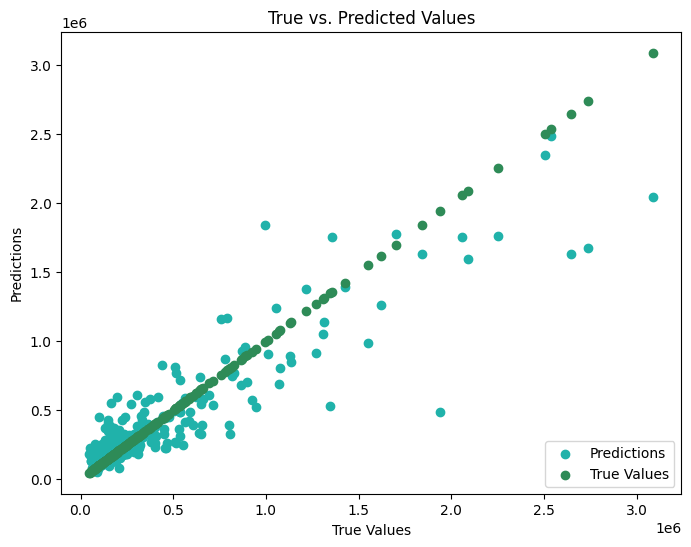

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='lightseagreen', label='Predictions')
plt.scatter(y_test, y_test, color='seagreen', label='True Values') 
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.legend(loc="lower right")
plt.show()

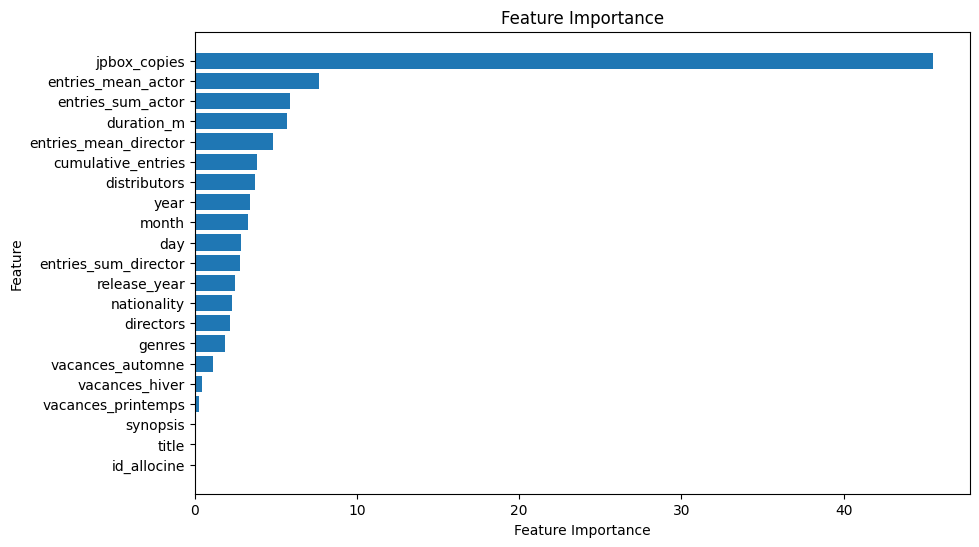

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Obtention des importances des caractéristiques
feature_importance = cat.feature_importances_

# Obtention des noms des caractéristiques
feature_names = X_train.columns

# Triez les importances des caractéristiques et les noms des caractéristiques
sorted_idx = np.argsort(feature_importance)
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Sauvegarde du modèle (pickle)

In [22]:
import pickle
with open('catboost_model.pkl', 'wb') as file:
    pickle.dump(cat, file)